In [1]:
# zipfile - python module for extracting files from a zip file
import zipfile
import os

# utility for copyfile
from shutil import copyfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from random import seed
from random import random

import tensorflow as tf
# deep learning library, transform and augment image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2

In [2]:
# 1.0 data acquisition and finding filenames and labels
train_zip_file_path = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train.zip"
test_zip_file_path = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/test1.zip"
files = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/"

# 1.1 image extraction
with zipfile.ZipFile(train_zip_file_path, 'r') as zipp:
    zipp.extractall(files)

with zipfile.ZipFile(test_zip_file_path, 'r') as zipp:
    zipp.extractall(files)

In [3]:
image_dir_train = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train/"
image_dir_test = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/test1/"

In [4]:
# 1.2 List all files in the directory, each list in string represents the name of a file( inthis case the name of an image) within the image directory.

filenames_training = os.listdir(image_dir_train) #list of strings
filenames_test = os.listdir(image_dir_test)
all_filenames = filenames_training + filenames_test

In [5]:
# 1.3 get original labels that are part of the filename
labels_training = [x.split(".")[0] for x in filenames_training]
test_labels = [x.split(".")[0] for x in filenames_test] # no labels in test
print("print training labels", labels_training)

print training labels ['dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat

In [6]:
# 1.4 define new labels without the .dot in the file name. remember the test data does not have lables do not apply
# new_filename_training = [x.replace('.'[0], '_',1) for x in filenames_training]

In [7]:
# 1. 5 list all filenames and labels in DF
# df_training_data = pd.DataFrame({"filename": new_filename_training, "label": labels_training})
df_training_data = pd.DataFrame({"filename": filenames_training, "label": labels_training})
df_testing_data = pd.DataFrame({"filename": filenames_test})

print(df_training_data.shape)
print("training data", df_training_data.head())
print("test data", df_testing_data.head())


(25000, 2)
training data         filename label
0   dog.8011.jpg   dog
1   cat.5077.jpg   cat
2   dog.7322.jpg   dog
3   cat.2718.jpg   cat
4  cat.10151.jpg   cat
test data    filename
0  9733.jpg
1    63.jpg
2  6400.jpg
3   823.jpg
4  4217.jpg


In [8]:
# 1.6 option to convert dog and cats to 1 and 2.

#label_mapping = {'cat': 0, 'dog': 1}
#df_training_data['label'] = df_training_data['label'].map(label_mapping)
#print(df_training_data)

# df_combined = pd.concat([df_training_data.reset_index(drop=True), df_test_data.reset_index(drop=True)], axis=0)
# print("check shape of combine dataset")
# print(df_combined.shape)

In [9]:
#1.7 image preprocessing
def process_training_images():
    training_data = []

    for filename in filenames_training:
        file_path = os.path.join(image_dir_train, filename)

        # read image from that location with filename
        image = cv2.imread(file_path)

        if image is not None:
            image = cv2.resize(image, (150, 150))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            training_data.append([image])
        else:
            print("No image provided, Training Resizing failed")

print("Set of training images have been standardised 150 x 150 and from BGR to RGB")

Set of training images have been standardised 150 x 150 and from BGR to RGB


In [10]:
# test data preprocessing 

def process_testing_images():
    testing_data = []

    for filename in filenames_test:
        file_path = os.path.join(image_dir_test, filename)

        # read image from that location with filename
        image = cv2.imread(file_path)

        if image is not None:
            image = cv2.resize(image, (150, 150))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            testing_data.append([image])
        else:
            print("No image provided")


print("Set of testing images have been standardised 150 x 150 and from BGR to RGB")

Set of testing images have been standardised 150 x 150 and from BGR to RGB


In [11]:
process_training_images()
process_testing_images()

In [12]:
#2.0  split train test using data frame
# we use this to stratify and ensure we maintain class distribution (ratio) of cats and dogs
labels_s = df_training_data['label']
# split 80: 20
# X_train, X_temp = train_test_split(df_training_data, test_size=0.2, stratify=labels_s, random_state=42)
X_train, X_val = train_test_split(df_training_data, test_size=0.2, stratify=labels_s, random_state=42)

# use to maintain class distribution with stratify the 20% ratio of cat and dogs as original data
# label_test_val = X_temp['label']
# split 10: 10
# X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state=42)

print("The shape of train data", X_train.shape)
#print("The shape of test data", X_temp.shape)
#print("The shape of test data", X_test.shape)
print("The shape of validation data", X_val.shape)

The shape of train data (20000, 2)
The shape of validation data (5000, 2)


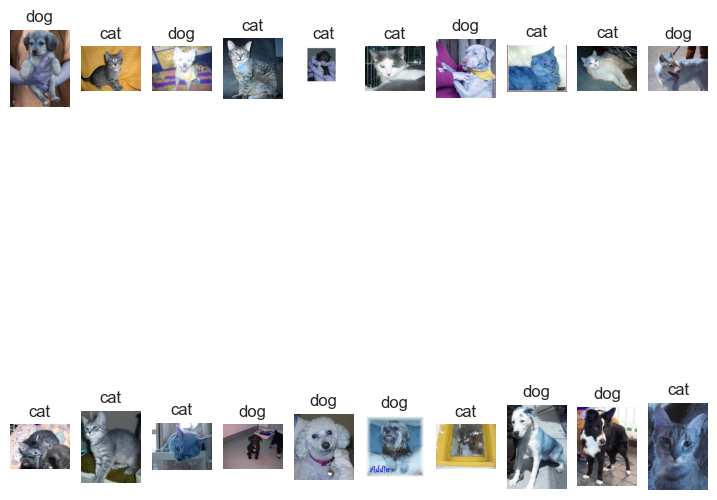

In [15]:
# 3.0 EDA surface some content 
def visualise_subset_images():
    plt.figure(figsize=(9, 9))

    for i in range(20):
        plt.subplot(2, 10, i + 1)  # Create a subplot for each image
        file_path_local = os.path.join(image_dir_train, filenames_training[i])
        image = cv2.imread(file_path_local)
        if image is not None:  # Check if image is read correctly
            plt.imshow(image)
            plt.title(labels_training[i], fontsize=12)
            plt.axis('off')
        else:
            print(f"Error reading image: {filename}")

    plt.show()


visualise_subset_images()


In [16]:
#4.0 set up directory structure on local machine
dataset_home = '/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labeldir in labeldirs:
        newdir = os.path.join(dataset_home, subdir, labeldir)
        os.makedirs(newdir, exist_ok=True)

print("Check subdirectories")

Check subdirectories


In [17]:
# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.2

# 6.0 copy training dataset images into subdirectories we have created from the below directory
src_directory = '/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train'

# this loop goes through every file in source and constructs the full path to each file
for file in os.listdir(src_directory):
    src = src_directory + '/' + file

    # random assignment to training or testing
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'

    # categorize and copy
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src, dst)
        print(dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' + file
        copyfile(src, dst)
        

        

# lets check.
path1 = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/dogs"
path2 = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats"
path3 = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/test/dogs"
path4 = "/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/test/cats"

print("The number of dogs in training", len(os.listdir(path1)))
print("The number of cats in training", len(os.listdir(path2)))
print("The number of dogs in test/validation", len(os.listdir(path3)))
print("The number of cats in test/ validation", len(os.listdir(path4)))

/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.5077.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.2718.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.10151.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.3406.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.4369.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/test/cats/cat.7660.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.8553.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.9895.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.1211.jpg
/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/cat.6218.jpg
/Users/godfreykrutzsch/Desktop/projects/

In [20]:
print("check xtrain, xval and xtrain values")
print("X_val")
X_val.head()
print(X_val.shape)
print("X test")
#X_test.head()
#print(X_test.shape)
#print("X test values",X_test)
#print("X train")

X_train.head()
print(X_train.shape)
print(X_train)
print(df_testing_data.head())

check xtrain, xval and xtrain values
X_val
(5000, 2)
X test
(20000, 2)
           filename label
14991    dog.62.jpg   dog
10051   cat.857.jpg   cat
24530  dog.7071.jpg   dog
2536   dog.9084.jpg   dog
15942  dog.8257.jpg   dog
...             ...   ...
20121  dog.8233.jpg   dog
15884  dog.4337.jpg   dog
20972  cat.9733.jpg   cat
10405  cat.8866.jpg   cat
21774  dog.6023.jpg   dog

[20000 rows x 2 columns]
   filename
0  9733.jpg
1    63.jpg
2  6400.jpg
3   823.jpg
4  4217.jpg


In [25]:
# global parameters for training
batch_size = 32
image_size = 150

In [26]:
# create an instance of ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)


In [32]:
# load training images from directory
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    # directory="/Users/godfreykrutzsch/Desktop/DL_Cat_Dog/dataset_dogs_vs_cats/train/",  # directory containing training images
                                                    directory='/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train/',
                                                    x_col='filename', # the column in the dataframe with filenames
                                                    y_col='label', # the column in the dataframe with labels
                                                    batch_size=batch_size,  # The number of images to return each batch
                                                    validate_filenames=False,
                                                    class_mode='binary', # it accepts label string and converts on its own to 1 and 0 for learning
                                                    target_size=(image_size, image_size),
                                                    color_mode='rgb',
                                                    )
validation_generator = val_datagen.flow_from_dataframe(X_val,
                                                       # directory='/Users/godfreykrutzsch/Desktop/DL_Cat_Dog/dataset_dogs_vs_cats/train/cats/',
                                                       #directory='train/',
                                                       directory='/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train',
                                                       x_col='filename',
                                                       y_col='label',
                                                       batch_size=batch_size,
                                                       validate_filenames=False,
                                                       class_mode='binary',
                                                       target_size=(image_size, image_size),
                                                       shuffle=False,
                                                       color_mode='rgb')

test_generator = test_datagen.flow_from_dataframe(df_testing_data,
                                               directory='/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/test1/',
                                                  x_col='filename',
                                                  y_col=None,
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  validate_filenames=False,
                                                class_mode=None,
                                                  shuffle=False,
                                                  target_size=(image_size, image_size))


Found 20000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Found 12500 non-validated image filenames.


In [33]:
# build model and cnn architecture
# relu is the activation function like Sigmoid both extensively used.
baseline_model = tf.keras.models.Sequential()
baseline_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))
baseline_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))
baseline_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#flatten output to feed in Dense layer
baseline_model.add(Flatten())

In [35]:
#add fully connected layer
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(Dense(1, activation='sigmoid'))

In [36]:
# compile the model
# optimizer defines optimization for training.
# loss - measure how well model prediction match true labels
# metrics e.g. useful info about models performance
baseline_model.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

In [37]:
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#train_dir = '/Users/godfreykrutzsch/Desktop/DL_Cat_Dog/dataset_dogs_vs_cats/train'
train_dir = '/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train/'
for root, dirs, files in os.walk(train_dir):
    print(f"Root: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")


Root: /Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/train/
Subdirectories: []
Files: ['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg', 'cat.8553.jpg', 'cat.9895.jpg', 'cat.1211.jpg', 'dog.3144.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'cat.6218.jpg', 'dog.11664.jpg', 'dog.3622.jpg', 'cat.1577.jpg', 'cat.12020.jpg', 'dog.5253.jpg', 'cat.7106.jpg', 'cat.8235.jpg', 'cat.952.jpg', 'dog.9469.jpg', 'dog.1035.jpg', 'cat.3360.jpg', 'cat.11529.jpg', 'cat.10637.jpg', 'dog.6982.jpg', 'dog.8777.jpg', 'dog.7444.jpg', 'cat.5711.jpg', 'cat.946.jpg', 'cat.3374.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'cat.10623.jpg', 'dog.8763.jpg', 'cat.5705.jpg', 'dog.7450.jpg', 'dog.12379.jpg', 'dog.11670.jpg', 'dog.4159.jpg', 'cat.1563.jpg', 'dog.3636.jpg', 'cat.12034.jpg', 'dog.2528.jpg', 'cat.7112.jpg', 'dog.5247.jpg', 'cat.8221.jpg', 'dog.10208.jpg', 'dog.5521.jpg', 'cat.7674.jpg', 'cat.8547.jpg', 'cat.

In [39]:
# train the baseline model
history_baseline = baseline_model.fit(
    train_generator,
steps_per_epoch=100,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.5018 - loss: 0.7610 - val_accuracy: 0.5950 - val_loss: 0.6774
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.5894 - loss: 0.6757 - val_accuracy: 0.5531 - val_loss: 0.6781
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.5940 - loss: 0.6676 - val_accuracy: 0.6369 - val_loss: 0.6583
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.6219 - loss: 0.6391 - val_accuracy: 0.6700 - val_loss: 0.6375
Epoch 5/10


2024-08-07 11:57:46.565644: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.6551 - loss: 0.6235 - val_accuracy: 0.6850 - val_loss: 0.6019
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.6743 - loss: 0.5983 - val_accuracy: 0.6794 - val_loss: 0.5996
Epoch 7/10
 25/100 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.7240 - loss: 0.5496

2024-08-07 11:58:50.330326: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7060 - loss: 0.5763 - val_accuracy: 0.6769 - val_loss: 0.5931
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.6997 - loss: 0.5789 - val_accuracy: 0.8100 - val_loss: 0.5246
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.7310 - loss: 0.5379 - val_accuracy: 0.7156 - val_loss: 0.5700
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.7341 - loss: 0.5341 - val_accuracy: 0.7700 - val_loss: 0.4857


Learning curves

In [45]:
"""
this code extracts the training loss and validation loss values from the training history of a the DL model and stores them in separate lists. This is typically done to analyze the training and validation performance of the model over epochs.
"""
history_dict = history_baseline.history      # holds  loss & metrics  record end each epoc training
loss_values = history_dict['loss']  # stores list of loss values
val_loss_values = history_dict['val_loss'] # stores list
print(history_dict.keys())
# print(loss_values) # 30 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [46]:
baseline_model.save("/Users/godfreykrutzsch/Desktop/projects/DL_Cat_Dog/catvdog.keras")

Prediction

In [43]:
test_predictions = baseline_model.predict(test_generator)
test_predictions

  1/391 ━━━━━━━━━━━━━━━━━━━━ 1:43 265ms/step

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step


array([[0.39744392],
       [0.48735952],
       [0.8483223 ],
       ...,
       [0.4437622 ],
       [0.256535  ],
       [0.99710196]], dtype=float32)

In [47]:
y_pred_submit = (test_predictions >= 0.5).astype(float)
y_test_submit = y_pred_submit.reshape(-1).squeeze()
y_test_submit

array([0., 0., 1., ..., 0., 0., 1.])

In [ ]:
# X_test.head()
#X_test.info()

In [48]:
#result_id = X_test['id']
result = pd.DataFrame({
   #'id': result_id,
    'label': y_test_submit
})

result.to_csv('submission.csv', index=False)

range(1, 11)


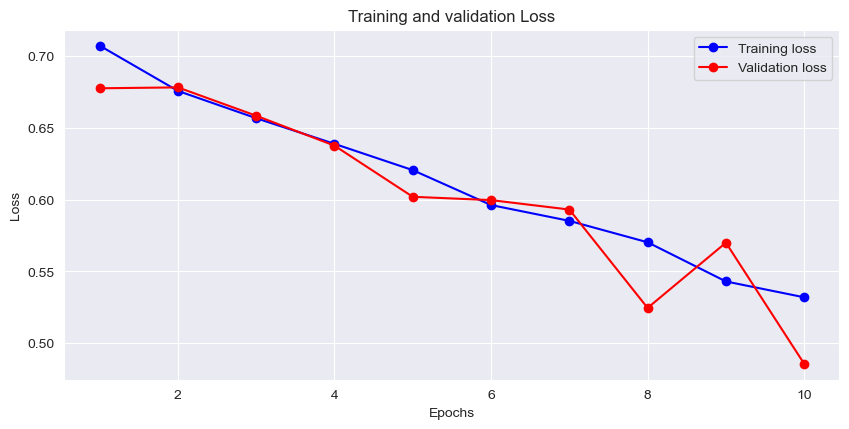

In [49]:
# Loss

#len(loss_values) returns number of epochs for which model was trained e.g. 10
epochs_x = range(1, len(loss_values) + 1)
print(epochs_x)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'b-o', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'r-o', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

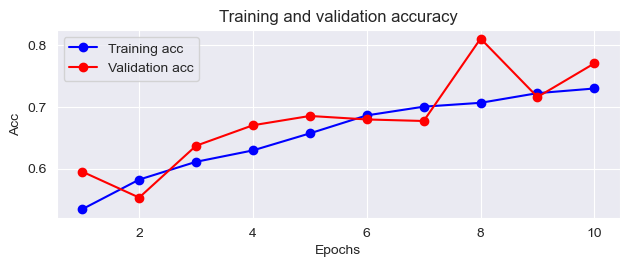

In [50]:
# Accuracy
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'b-o', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'r-o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.tight_layout()
plt.show()

Evaluation

In [51]:
score = baseline_model.evaluate(validation_generator, verbose=2)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

157/157 - 16s - 104ms/step - accuracy: 0.7664 - loss: 0.4983
Val loss: 0.4983433187007904
Val accuracy: 0.7663999795913696


In [52]:
score_2 = baseline_model.evaluate(test_generator, verbose=2)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

ValueError: None values not supported.

Confusion matrix

In [54]:
y_pred = np.argmax(baseline_model.predict(test_generator), axis=1)
cm = confusion_matrix(test_generator, y_pred)
print(cm)

391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step


ValueError: Found input variables with inconsistent numbers of samples: [391, 12500]